In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

A frequency table allows us to summarize from a large dataset. For instance, suppose we have a table that shows the marks achieved by 1000 students for a particular subject, as shown in the table below. Due to the amount of data we have, it is impossible to analyze the data one by one. However, we can summarize this by converting them into _categorical variables_, and identify the occurence of each category.

In [202]:
grades = np.random.poisson(50,1000)
df_grades = pd.DataFrame(grades,columns=['Marks'])

df_grades

,Marks
0,49
1,58
2,63
3,58
4,46
...,...
995,48
996,51
997,43
998,49


In [203]:
labels = list('ABCDEF')
labels.reverse()
grades_binned = pd.cut(grades,labels=labels,bins=len(labels))

df_grades_categorical = pd.DataFrame(grades_binned.value_counts(),columns=['Frequency'])
df_grades_categorical.index.rename('Grades',inplace=True)

total = pd.DataFrame(len(grades),columns=['Frequency'],index=['Total'])
df_grades_categorical.append(total)

,Frequency
F,3
E,106
D,418
C,379
B,83
A,11
Total,1000


As we can see, by summarizing them into the number of occurences, we get a better picture. We can further improve this by converting them into percentages, or even plotting a histogram.

In [204]:
df_grades_categorical['Frequency'] *= 100 / len(df_grades)
df_grades_categorical['Frequency'] = df_grades_categorical['Frequency'].apply(lambda x : '{:.2f}%'.format(x))
df_grades_categorical = df_grades_categorical.append(total)
df_grades_categorical.iloc[-1] = '100%'

df_grades_categorical

,Frequency
F,0.30%
E,10.60%
D,41.80%
C,37.90%
B,8.30%
A,1.10%
Total,100%


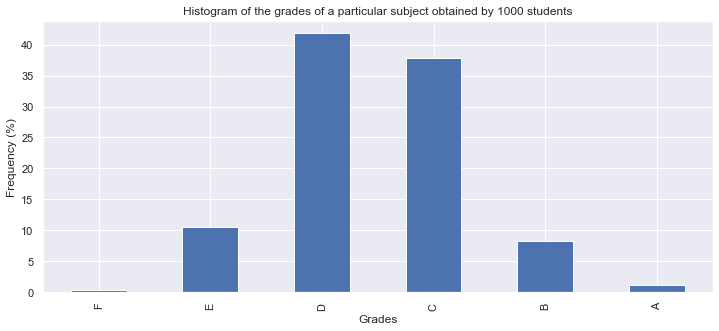

In [206]:
plt.figure(figsize=(12,5))
percentages = df_grades_categorical['Frequency'].apply(lambda x : x.replace('%','')).astype(np.float64)
percentages.iloc[:-1].plot(kind='bar')
plt.xlabel('Grades')
plt.ylabel('Frequency (%)')
plt.title('Histogram of the grades of a particular subject obtained by 1000 students')
plt.show()

As we can see, it is easier for us to visualize the results with a histogram/frequency table. We can see that the majority of the students have obtained Cs and Ds for the subject. In this case, we can conclude that this subject may be a difficult subject for most students as the frequency for A grade is less than 5%, and the frequency for C and D grades are quite high.